### Checkpoint 1: Credit Cards

By: Anjali Dembla,
Mariya Ghori,
Daniel Tamayo Diaz,
Sowmya Yalamanchili,
Tejesh Alaparthi

# Library

In [269]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set visualization style
sns.set_style('whitegrid')

from matplotlib import figure
#%matplotlib inline

from IPython.display import Image

import re

import plotly.express as px

# EDA

In [270]:
df = pd.read_csv("BankChurners.csv")

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [272]:
# fix feature name
df = df.rename(columns={
    'CLIENTNUM': 'Client_Num',
    'Dependent_count': 'Dependent_Count',
    'Months_on_book': 'Months_on_Book',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'Naive_Bayes_Classifier_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'Naive_Bayes_Classifier_2'
})

df.head()

,Client_Num,Attrition_Flag,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1,Naive_Bayes_Classifier_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


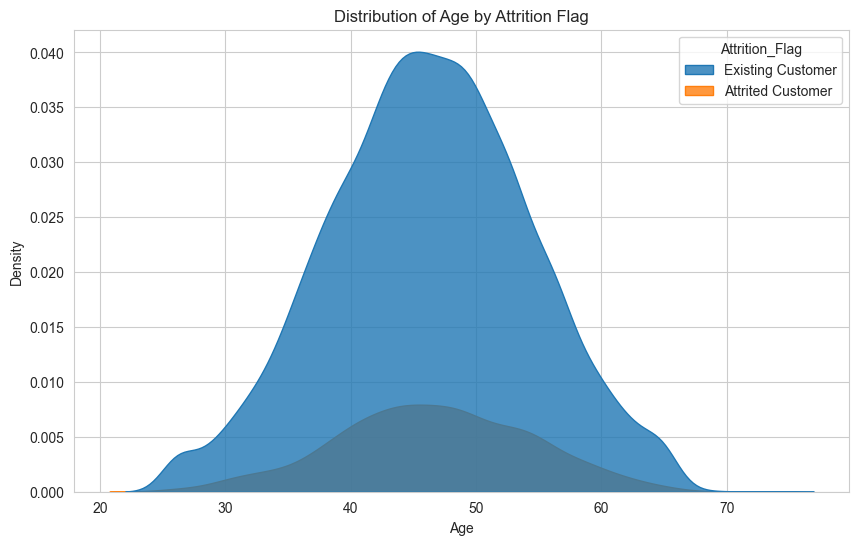

In [273]:
# Plot distribution of age by attrition flag
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Customer_Age', hue='Attrition_Flag', shade=True, alpha=0.8)
plt.title('Distribution of Age by Attrition Flag')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [274]:
aggdata= df.groupby(['Attrition_Flag'])['Client_Num'].count().to_frame().reset_index()

labels = aggdata.Attrition_Flag
values = aggdata.Client_Num

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2])])
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.10,
    xanchor="left",
    x=0.20
))

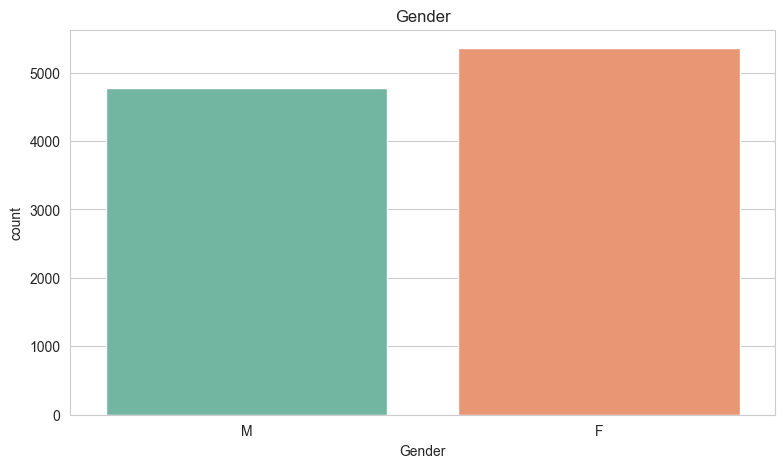

In [275]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)
plt.show()

In [276]:
cross_tab = pd.crosstab(index=df['Gender'],
                        columns=df['Attrition_Flag'])


cross_tab_prop = pd.crosstab(index=df['Gender'],
                        columns=df['Attrition_Flag'],
                             normalize="index")

cross_tab_prop = cross_tab_prop.reset_index()
cross_tab_prop

Attrition_Flag,Gender,Attrited Customer,Existing Customer
0,F,0.173572,0.826428
1,M,0.146152,0.853848


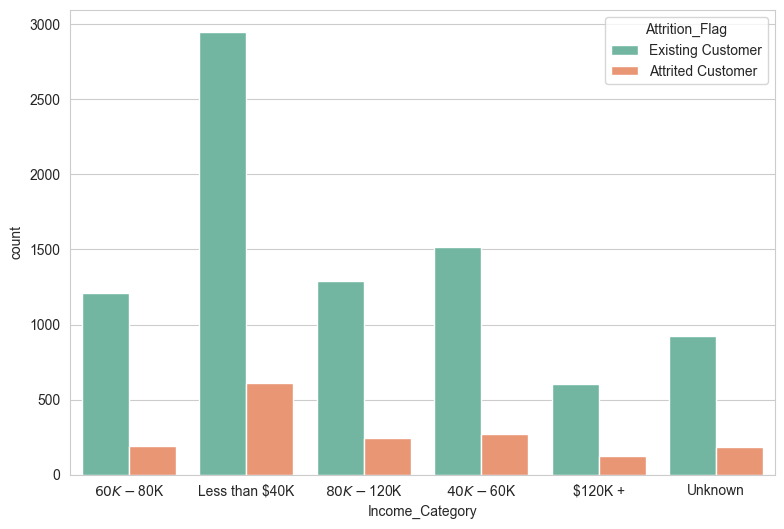

In [277]:
plt.figure(figsize = (20,35))
plt.subplot(5,2,10)
sns.countplot(x = 'Income_Category', hue = 'Attrition_Flag', palette = 'Set2', data = df)
plt.show()

In [278]:
cross_tab = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,0.173315,0.826685
$40K - $60K,0.151397,0.848603
$60K - $80K,0.134807,0.865193
$80K - $120K,0.157655,0.842345
Less than $40K,0.171862,0.828138
Unknown,0.168165,0.831835


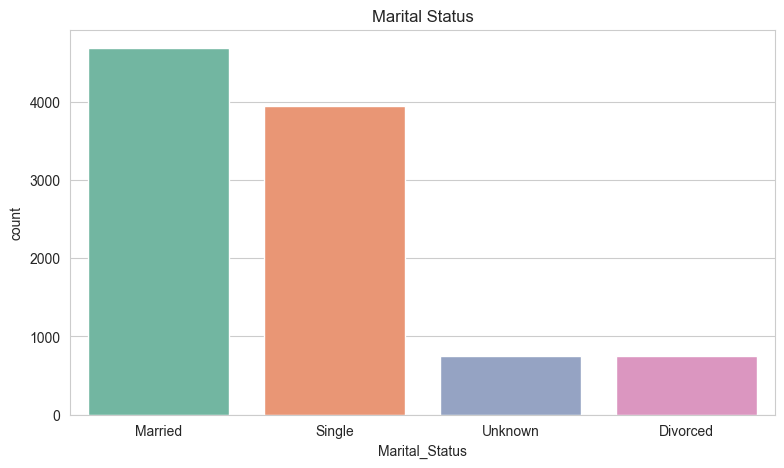

In [279]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Marital Status')
sns.countplot(x = 'Marital_Status', palette = 'Set2', data = df)
plt.show()

In [280]:
cross_tab = pd.crosstab(index=df['Marital_Status'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Marital_Status'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,0.161765,0.838235
Married,0.151269,0.848731
Single,0.169414,0.830586
Unknown,0.172230,0.827770


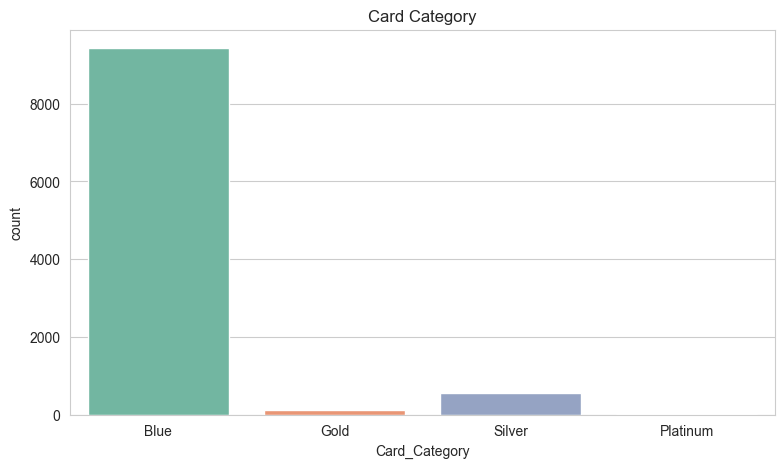

In [281]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Card Category')
sns.countplot(x = 'Card_Category', palette = 'Set2', data = df)
plt.show()


In [282]:
cross_tab = pd.crosstab(index=df['Card_Category'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Card_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,0.160979,0.839021
Gold,0.181034,0.818966
Platinum,0.250000,0.750000
Silver,0.147748,0.852252


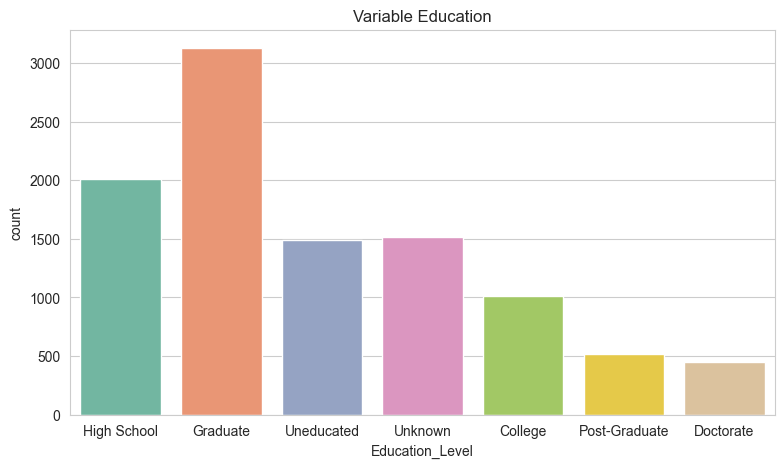

In [283]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Education_Level', palette = 'Set2', data = df)
plt.show()

In [284]:
cross_tab = pd.crosstab(index=df['Education_Level'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Education_Level'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,0.152024,0.847976
Doctorate,0.210643,0.789357
Graduate,0.155691,0.844309
High School,0.152012,0.847988
Post-Graduate,0.178295,0.821705
Uneducated,0.159381,0.840619
Unknown,0.168532,0.831468


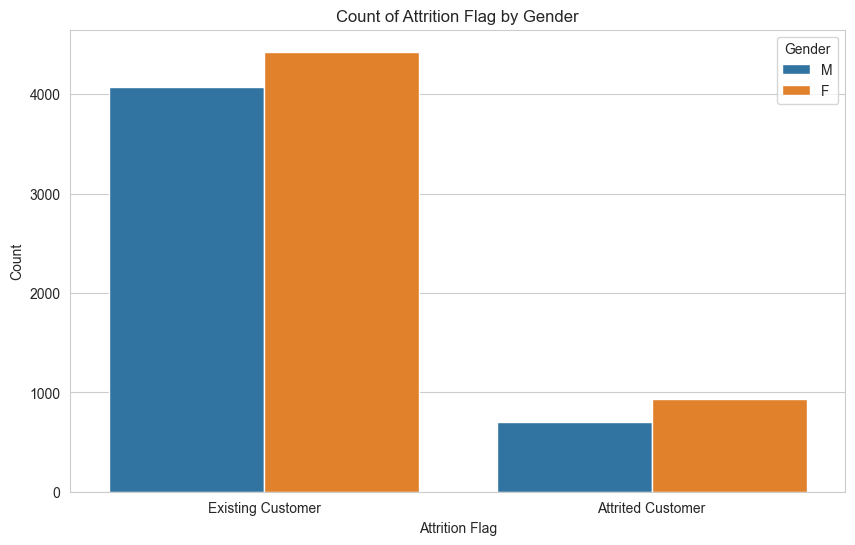

In [285]:
# Plot count of attrition flag by gender
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Attrition_Flag', hue='Gender')
plt.title('Count of Attrition Flag by Gender')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()

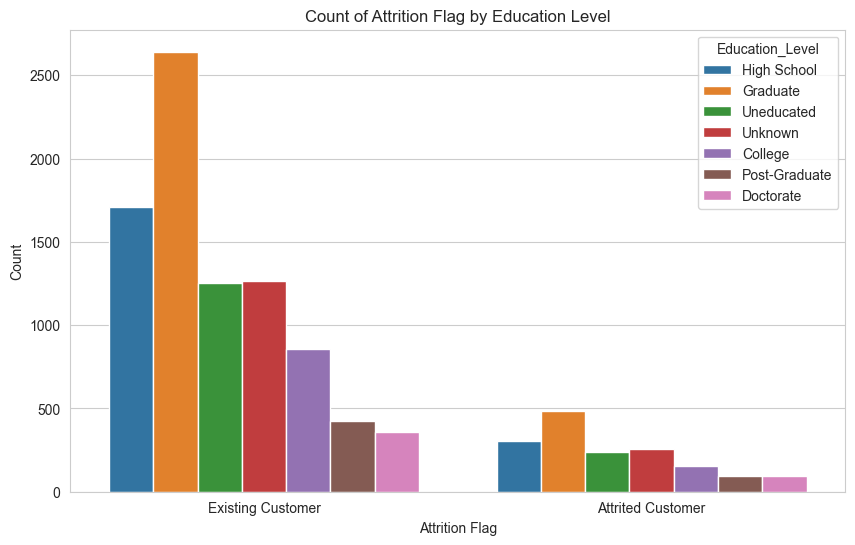

In [286]:
# Plot count of attrition flag by education level
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Attrition_Flag', hue='Education_Level')
plt.title('Count of Attrition Flag by Education Level')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()

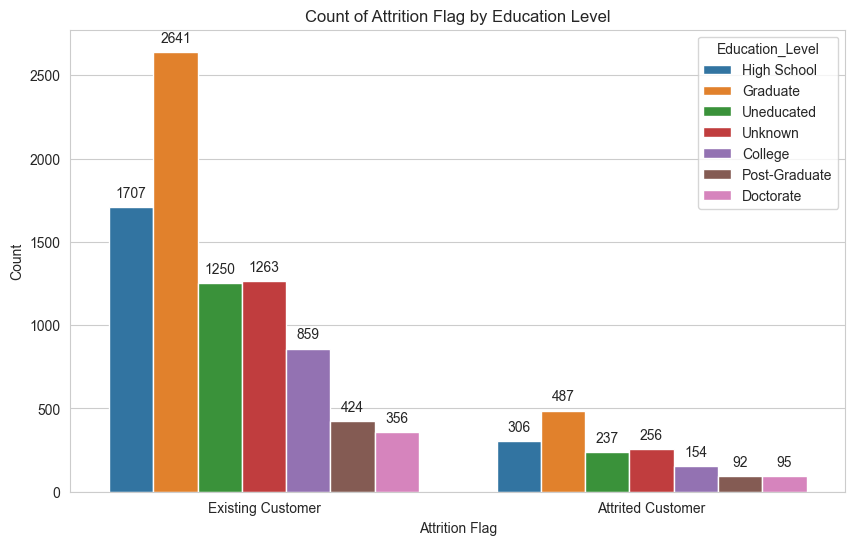

In [287]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Attrition_Flag', hue='Education_Level')

# Add count values on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Count of Attrition Flag by Education Level')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()



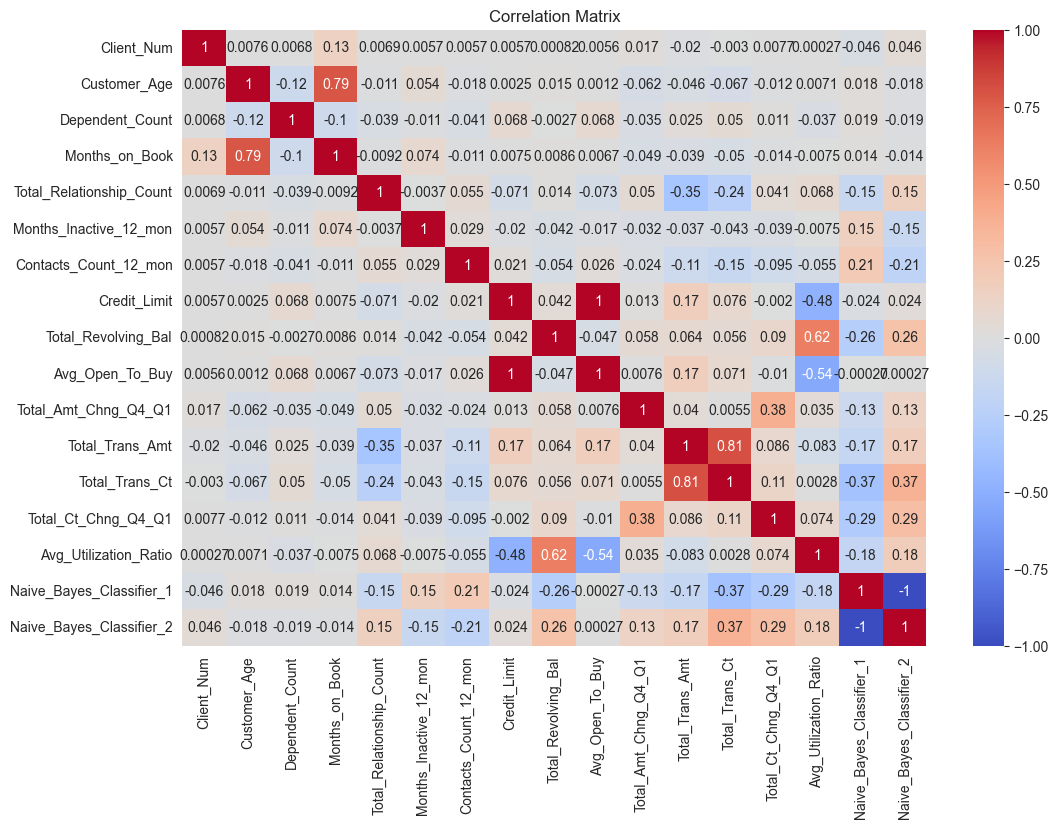

In [288]:
# Plot correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot: xlabel='Attrition_Flag', ylabel='count'>

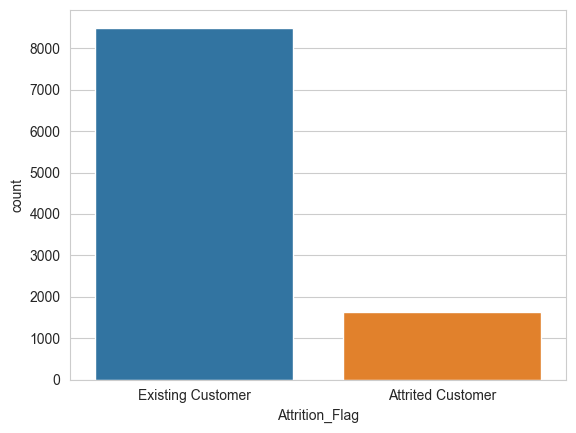

In [289]:
import seaborn as sns

sns.countplot(x='Attrition_Flag', data=df)

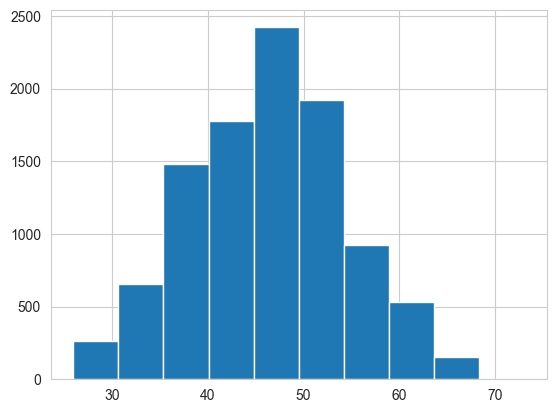

In [290]:
import matplotlib.pyplot as plt

plt.hist(x='Customer_Age', data=df, bins=10)
plt.show()

<AxesSubplot: xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

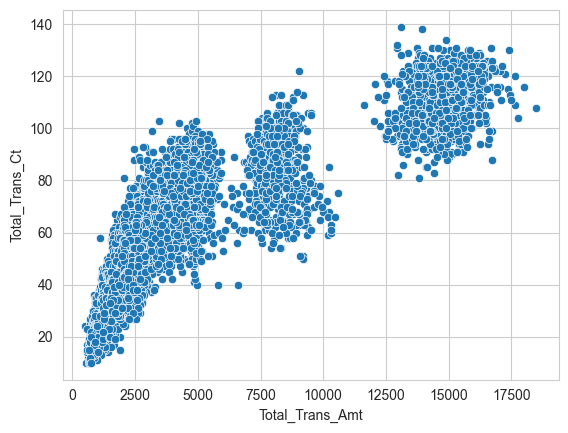

In [291]:
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=df)

<AxesSubplot: xlabel='Attrition_Flag', ylabel='Total_Relationship_Count'>

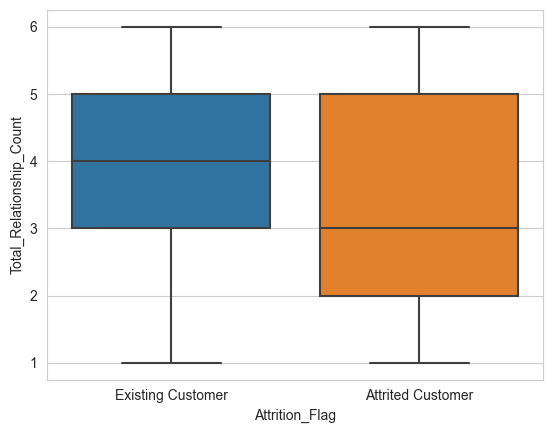

In [292]:
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=df)

In [293]:
df.corr()

,Client_Num,Customer_Age,Dependent_Count,Months_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1,Naive_Bayes_Classifier_2
Client_Num,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266,-0.046411,0.046410
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.018189,-0.018189
Dependent_Count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.019189,-0.019189
Months_on_Book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.013693,-0.013694
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.149981,0.149981
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.153452,-0.153452
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,0.205772,-0.205772
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,-0.023853,0.023853
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,-0.263033,0.263032
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808,-0.000267,0.000267


In [294]:
df.isnull().sum()

Client_Num                  0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_Count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_Book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Naive_Bayes_Classifier_1    0
Naive_Bayes_Classifier_2    0
dtype: int64

In [295]:
df.head()

,Client_Num,Attrition_Flag,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1,Naive_Bayes_Classifier_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Preprocessing

In [296]:
# Drop feature 
df = df.drop(['Client_Num'], axis=1)

Remove "unknown" values

In [297]:
df = df[~(df['Education_Level'] == 'Unknown')]
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [298]:
df = df[~(df['Marital_Status'] == 'Unknown')]
df['Marital_Status'].value_counts()

Married     3999
Single      3322
Divorced     652
Name: Marital_Status, dtype: int64

In [299]:
df = df[~(df['Income_Category'] == 'Unknown')]
df['Income_Category'].value_counts()


Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: Income_Category, dtype: int64

Transform Categorical Features Into Numerical/Dummy Variables

In [300]:
# Tranform Categorical Feature
#df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})
df = pd.get_dummies(df, columns=['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

# Scaling Numerical feature
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Customer_Age', 
                                           'Dependent_Count', 
                                           'Months_on_Book', 
                                           'Total_Relationship_Count',
                                           'Months_Inactive_12_mon', 
                                           'Contacts_Count_12_mon', 
                                           'Credit_Limit',
                                           'Total_Revolving_Bal', 
                                           'Avg_Open_To_Buy', 
                                           'Total_Amt_Chng_Q4_Q1',
                                           'Total_Trans_Amt', 
                                           'Total_Trans_Ct', 
                                           'Total_Ct_Chng_Q4_Q1',
                                           'Avg_Utilization_Ratio']])

df_scaled = pd.DataFrame(scaled_features, columns=['Customer_Age', 
                                                   'Dependent_Count', 
                                                   'Months_on_Book', 
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon', 
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal', 
                                                   'Avg_Open_To_Buy', 
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt', 
                                                   'Total_Trans_Ct', 
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio'])

df.drop(['Customer_Age', 'Dependent_Count', 'Months_on_Book', 'Total_Relationship_Count',
         'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
         'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
         'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
         'Avg_Utilization_Ratio','Naive_Bayes_Classifier_1','Naive_Bayes_Classifier_2'], axis=1, inplace=True)

df_scaled = df_scaled.reset_index(drop=True)
df = df.reset_index(drop=True)

df = pd.concat([df, df_scaled], axis=1)

In [301]:
df.shape

(7081, 30)

In [302]:
df.head()

,Attrition_Flag,Gender,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Customer_Age,Dependent_Count,Months_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,-0.167610,0.512710,0.377234,0.764487,-1.349309,0.493777,0.460058,-0.480760,0.502567,2.574433,-0.937167,-0.945214,3.827331,-0.794057
1,Existing Customer,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0.329862,2.061228,1.002074,1.412015,-1.349309,-0.411332,-0.025947,-0.373652,0.007308,3.497689,-0.894783,-1.323244,12.579779,-0.636187
2,Existing Customer,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0.578598,0.512710,0.002330,0.116959,-1.349309,-2.221550,-0.556114,-1.437353,-0.427933,8.217051,-0.722936,-1.869287,6.793694,-1.012921
3,Existing Customer,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,-0.789449,0.512710,-1.872192,0.764487,-1.349309,-2.221550,-0.413874,-1.437353,-0.285773,6.339166,-1.031741,-1.533260,7.493388,-1.012921
4,Existing Customer,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,-0.291978,-0.261549,0.002330,-0.530569,-1.349309,-0.411332,-0.491240,0.097873,-0.499670,2.758188,-0.953314,-1.701273,0.563494,0.102927


In [303]:
df.dtypes

Attrition_Flag                     object
Gender                              int64
Education_Level_Doctorate           uint8
Education_Level_Graduate            uint8
Education_Level_High School         uint8
Education_Level_Post-Graduate       uint8
Education_Level_Uneducated          uint8
Marital_Status_Married              uint8
Marital_Status_Single               uint8
Income_Category_$40K - $60K         uint8
Income_Category_$60K - $80K         uint8
Income_Category_$80K - $120K        uint8
Income_Category_Less than $40K      uint8
Card_Category_Gold                  uint8
Card_Category_Platinum              uint8
Card_Category_Silver                uint8
Customer_Age                      float64
Dependent_Count                   float64
Months_on_Book                    float64
Total_Relationship_Count          float64
Months_Inactive_12_mon            float64
Contacts_Count_12_mon             float64
Credit_Limit                      float64
Total_Revolving_Bal               

In [304]:
df.isnull().sum()

Attrition_Flag                    0
Gender                            0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K      0
Income_Category_Less than $40K    0
Card_Category_Gold                0
Card_Category_Platinum            0
Card_Category_Silver              0
Customer_Age                      0
Dependent_Count                   0
Months_on_Book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Avg_Open_To_Buy                   0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct              

# Modelling

In [305]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [306]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth = 4, random_state=42)
dt.fit(X_train, y_train)
y_predtrain_dt = cross_val_predict(estimator = dt, X = X_train, y = y_train, cv = 10)
y_pred_dt = dt.predict(X_test)

# Evaluate the Models
print('Accuracy Score (Decision Tree):', accuracy_score(y_test, y_pred_dt))
print('Validation Report (Decision Tree):\n ', classification_report(y_train, y_predtrain_dt))
print('Evaluation Report (Decision Tree):\n', classification_report(y_test, y_pred_dt))
print('Confusion Matrix (Decision Tree):\n', confusion_matrix(y_test, y_pred_dt))


Accuracy Score (Decision Tree): 0.9214117647058824
Validation Report (Decision Tree):
                     precision    recall  f1-score   support

Attrited Customer       0.82      0.65      0.72       783
Existing Customer       0.94      0.97      0.95      4173

         accuracy                           0.92      4956
        macro avg       0.88      0.81      0.84      4956
     weighted avg       0.92      0.92      0.92      4956

Evaluation Report (Decision Tree):
                    precision    recall  f1-score   support

Attrited Customer       0.80      0.65      0.72       330
Existing Customer       0.94      0.97      0.95      1795

         accuracy                           0.92      2125
        macro avg       0.87      0.81      0.84      2125
     weighted avg       0.92      0.92      0.92      2125

Confusion Matrix (Decision Tree):
 [[ 216  114]
 [  53 1742]]


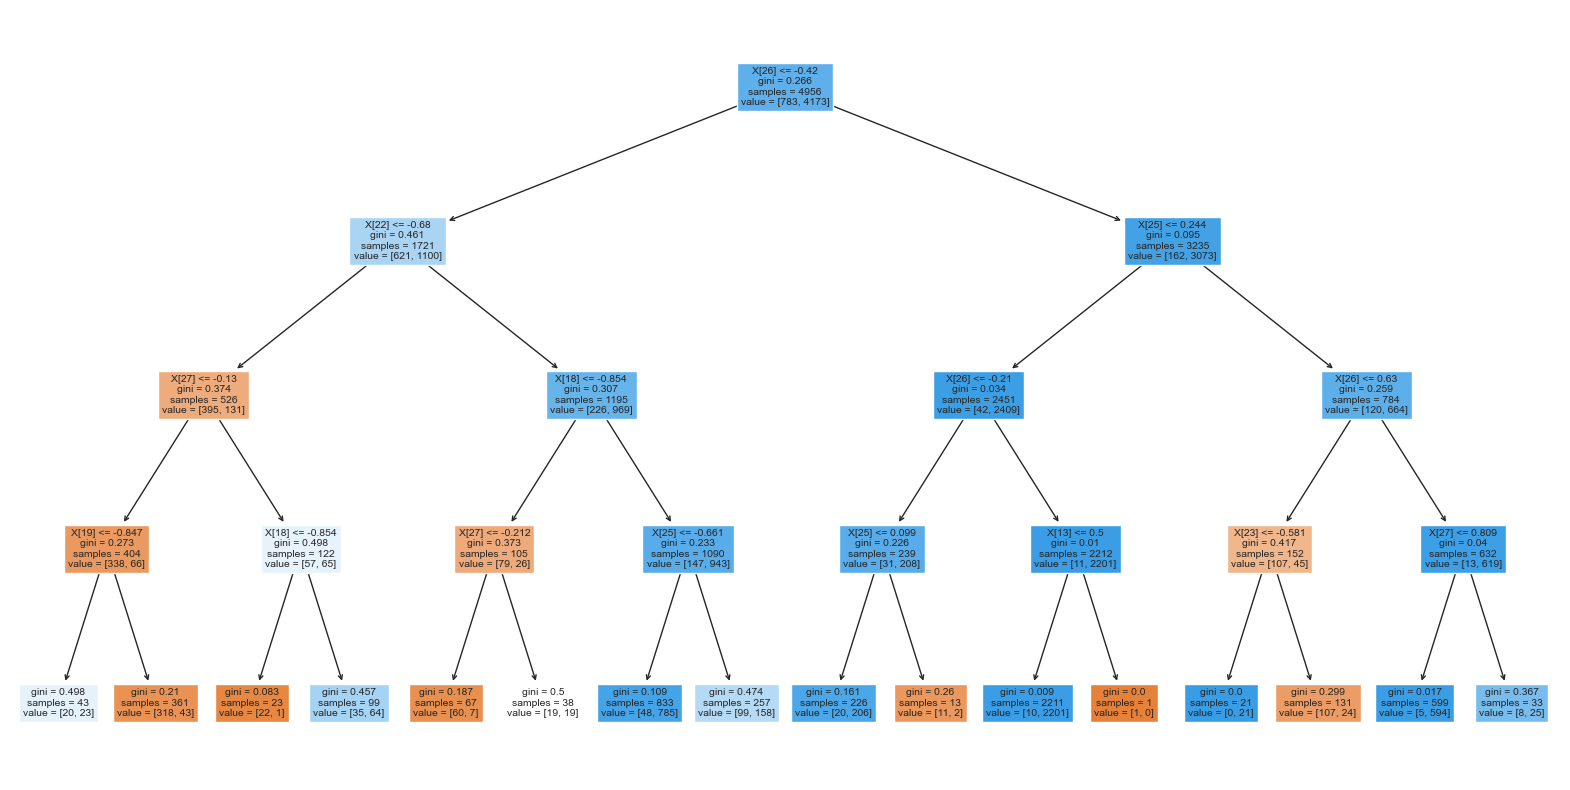

Height of the Decision Tree: 4


In [307]:
# plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True)
plt.show()

# determine the height of the decision tree
height = dt.get_depth()
print('Height of the Decision Tree:', height)

In [308]:
# Calculate the accuracy of the model on the training and test sets
train_accuracy = dt.score(X_train, y_train)
test_accuracy = dt.score(X_test, y_test)

# Compare the accuracy of the training and test sets
print(f'Training accuracy: {train_accuracy:.3f}')
print(f'Test accuracy: {test_accuracy:.3f}')

# Check for overfitting by comparing the training and test accuracies
if train_accuracy > test_accuracy:
    print('The model is overfitting.')
else:
    print('The model is not overfitting.')

Training accuracy: 0.931
Test accuracy: 0.921
The model is overfitting.


In [309]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_predtrain_rf = cross_val_predict(estimator = rf, X = X_train, y = y_train, cv = 10)
y_pred_rf = rf.predict(X_test)

print('\nAccuracy Score (Random Forest):', accuracy_score(y_test, y_pred_rf))
print('Validation Report (Random Forest):\n ', classification_report(y_train, y_predtrain_rf))
print('Evaluation Report (Random Forest):\n', classification_report(y_test, y_pred_rf))
print('Confusion Matrix (Random Forest):\n', confusion_matrix(y_test, y_pred_rf))


Accuracy Score (Random Forest): 0.9562352941176471
Validation Report (Random Forest):
                     precision    recall  f1-score   support

Attrited Customer       0.91      0.77      0.83       783
Existing Customer       0.96      0.98      0.97      4173

         accuracy                           0.95      4956
        macro avg       0.93      0.88      0.90      4956
     weighted avg       0.95      0.95      0.95      4956

Evaluation Report (Random Forest):
                    precision    recall  f1-score   support

Attrited Customer       0.92      0.78      0.85       330
Existing Customer       0.96      0.99      0.97      1795

         accuracy                           0.96      2125
        macro avg       0.94      0.89      0.91      2125
     weighted avg       0.96      0.96      0.95      2125

Confusion Matrix (Random Forest):
 [[ 258   72]
 [  21 1774]]


In [310]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Train the model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_predtrain_lr = cross_val_predict(estimator = lr, X = X_train, y = y_train, cv = 10)


#Predict on the test set
y_pred_lr = lr.predict(X_test)


#Evaluate the model
print('Accuracy Score (Logistic Regression):', accuracy_score(y_test, y_pred_lr))
print('Validation Report (Logistic Regression):\n ', classification_report(y_train, y_predtrain_lr))
print('Classification Report (Logistic Regression):\n', classification_report(y_test, y_pred_lr))
print('Confusion Matrix (Logistic Regression):\n', confusion_matrix(y_test, y_pred_lr))

Accuracy Score (Logistic Regression): 0.9035294117647059
Validation Report (Logistic Regression):
                     precision    recall  f1-score   support

Attrited Customer       0.75      0.55      0.64       783
Existing Customer       0.92      0.97      0.94      4173

         accuracy                           0.90      4956
        macro avg       0.84      0.76      0.79      4956
     weighted avg       0.89      0.90      0.89      4956

Classification Report (Logistic Regression):
                    precision    recall  f1-score   support

Attrited Customer       0.74      0.58      0.65       330
Existing Customer       0.93      0.96      0.94      1795

         accuracy                           0.90      2125
        macro avg       0.83      0.77      0.80      2125
     weighted avg       0.90      0.90      0.90      2125

Confusion Matrix (Logistic Regression):
 [[ 192  138]
 [  67 1728]]
